In [2]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np

import inspect
from inspect import signature

In [19]:
%matplotlib widget

## TOC
[Axes.setp](#step)  
[Axes.plot](#plot)

## Basic

**<span id="plot">Axes.plot</span>**

[line chart, line plot, line graph, curve chart](https://wikimili.com/en/Line_chart)

折线图是用一系列由线段连接的被称为'markers'的数据点展示信息的图表。折线图与散点图有相似的地方，最大的不同在于折线图的测量点是有序的并由线段连接。折线图通常用于可视化时间间隔（时间序列）中数据的趋势，因此折线通常按时间顺序绘制。 在这些情况下被称为[run charts](https://wikimili.com/en/Run_chart)。

### [Simple Plot](https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py)  
Lines, bars and markers - 36

In [8]:
# fake data
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

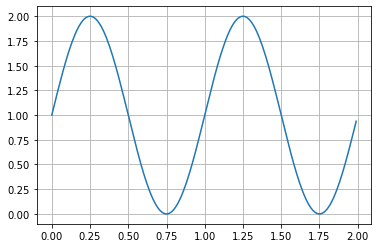

In [9]:
fig, ax = plt.subplots()
ax.plot(t, s)
ax.grid()

Plot方法将y对x绘制为线条和/或标记。

In [3]:
inspect.signature(Axes.plot)

<Signature (self, *args, scalex=True, scaley=True, data=None, **kwargs)>

plot方法的参数与scatter方法相比那是相当的简约，这就讨厌了，scalex, scaley虽然不明白是干嘛的，但好在一时也用不上，先放一边。data在scatter的示例中已经看过了，也暂放一边，现在我们在看看plot方法

```plot(self, *args, **kwargs)```

怎么样，简约而不简单就是这么讨厌，没有文档就完全不知道该怎么用。

Call signatures:
```
plot([x], y, [fmt], *, data=None, **kwargs)
plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```

**<span id="step">Axes.step</span>**


### Call signatures: 是什么？

在matplotlib api文档中的每一个函数的最重要位置都有Call signatures的描述。

这可能让人联想到多态，也与PEP 362有些混淆。我觉得这就是一种文档风格，并不是严格的词法定义。

目的是阐述一个函数支持的多种实用方法。

- PEP 362 -- [Function Signature Object](https://www.python.org/dev/peps/pep-0362/)
- 29.12.3. [Introspecting callables with the Signature object](https://docs.python.org/3.5/library/inspect.html#introspecting-callables-with-the-signature-object)
- [Signature (functions)](https://developer.mozilla.org/en-US/docs/Glossary/Signature/Function)
- [Programming Basics: The Function Signature](http://www.devx.com/opensource/programming-basics-the-function-signature.html)

## matplotlib.axes.Axes.[vlines](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html)

Plot vertical lines.
画垂线

Plot vertical lines at each x from ymin to ymax.
在每一个x值画一条从ymin至ymax的垂线

vline的核心是LineCollection

```python
class matplotlib.collections.LineCollection(segments, linewidths=None, colors=None, antialiaseds=None, linestyles='solid', offsets=None, transOffset=None, norm=None, cmap=None, pickradius=5, zorder=2, facecolors='none', **kwargs)[source]
```

In [23]:
s = signature( axes.Axes.vlines )

In [20]:
fig, ax = plt.subplots()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
ax.vlines(0.5, 0.2, 0.8)

In [ ]:
ax.vlines(0.5, 0.2, 0.8)

In [29]:
corners = (0,0), (1,1)

In [4]:
sig = signature( axes.Axes.plot )

In [6]:
str(sig)

'(self, *args, scalex=True, scaley=True, data=None, **kwargs)'

In [11]:
sig.parameters

mappingproxy({'self': <Parameter "self">,
              'args': <Parameter "*args">,
              'scalex': <Parameter "scalex=True">,
              'scaley': <Parameter "scaley=True">,
              'data': <Parameter "data=None">,
              'kwargs': <Parameter "**kwargs">})

In [12]:
sig.parameters['scalex'].annotation

inspect._empty

In [14]:
inspect.getclasstree(axes.Axes)

TypeError: 'type' object is not iterable

In [15]:
axes.Axes?

Init signature:
axes.Axes(
    fig,
    rect,
    facecolor=None,
    frameon=True,
    sharex=None,
    sharey=None,
    label='',
    xscale=None,
    yscale=None,
    **kwargs,
)
Docstring:     
The :class:`Axes` contains most of the figure elements:
:class:`~matplotlib.axis.Axis`, :class:`~matplotlib.axis.Tick`,
:class:`~matplotlib.lines.Line2D`, :class:`~matplotlib.text.Text`,
:class:`~matplotlib.patches.Polygon`, etc., and sets the
coordinate system.

The :class:`Axes` instance supports callbacks through a callbacks
attribute which is a :class:`~matplotlib.cbook.CallbackRegistry`
instance.  The events you can connect to are 'xlim_changed' and
'ylim_changed' and the callback will be called with func(*ax*)
where *ax* is the :class:`Axes` instance.

Attributes
----------
dataLim : `.BBox`
    The bounding box enclosing all data displayed in the Axes.
viewLim : `.BBox`
    The view limits in data coordinates.
Init docstring:
Build an axes in a figure.

Parameters
----------
fig : `~m

In [ ]:
def plot(self, *args, scalex=True, scaley=True, data=None, **kwargs):
    kwargs = cbook.normalize_kwargs(kwargs, mlines.Line2D)
        lines = [*self._get_lines(*args, data=data, **kwargs)]
        for line in lines:
            self.add_line(line)
        self._request_autoscale_view(scalex=scalex, scaley=scaley)
        return lines

In [ ]:
def cla(self):
    """Clear the current axes."""
    # Note: this is called by Axes.__init__()

    # stash the current visibility state
    self._get_lines = _process_plot_var_args(self)

In [22]:
class C():
    def __init__(self):
        print("i am init")
    def f(self):
        print("i am f")

In [23]:
c = C()

i am init


In [16]:
c.f()

i am f


In [20]:
C.f(C)

i am f


冷知识

x 与 y 作为关键字参数名时会出现 plot got an unexpected keyword argument 'x' 的提示